# Tugas Ho 2
**Nama**: Elsa Elisa Yohana Sianturi  
**NIM**: 122140135  

# No I

- **Durasi**: 135 (Second)
- **Sampling Rate**: 150 Hz.
- **Noise Level**: 0.<2 digit NIM terakhir> → 0.35.
- **Heart Rate**: 80 Beat Per Minute (BPM).
- **Random State**: Tanggal bulan tahun lahir Anda dengan format YYMMD. --> 031209 (09 Desember 2003)


### Membuat Sinyal PPG


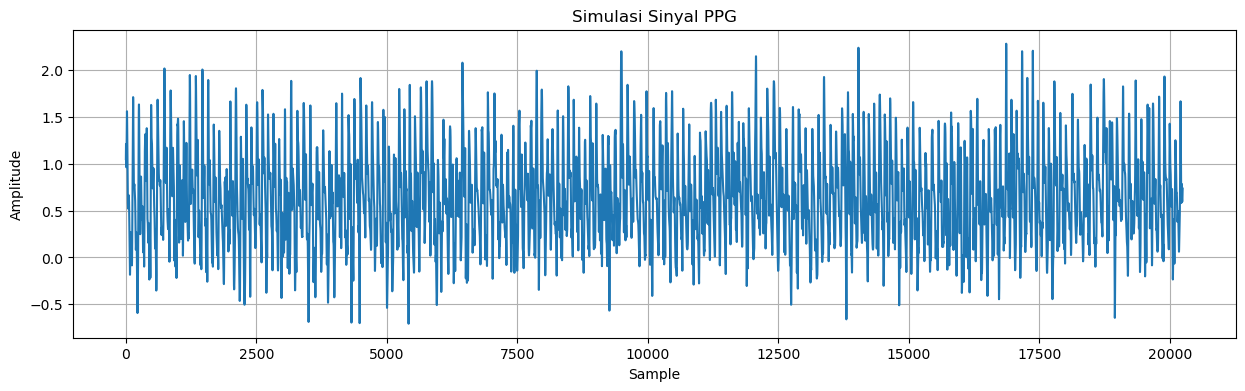

In [23]:
import neurokit2 as nk
import matplotlib.pyplot as plt

# Set parameter
duration = 135  #NIM terakhir 135 (122140135)
sampling_rate = 150  # in Hz
noise = 0.35  # 0.(2 digit nim terakhir dari nim) 0.35
heart_rate = 80  # in BPM
random_state = 31209  # menggunakan tanggal lahir, bulan, tahun lahir (yymmdd) --> 09 desember 2003 # (yymmdd) --> 031209

# Simulasi sinyal PPG
ppg_signal = nk.ppg_simulate(
    duration=duration,
    sampling_rate=sampling_rate,
    heart_rate=heart_rate,
    random_state=random_state
)

# Tambahkan noise ke sinyal
ppg_signal = nk.signal_distort(ppg_signal, noise_amplitude=noise)

# Plot hasil simulasi
plt.figure(figsize=(15, 4))
plt.plot(ppg_signal)
plt.title('Simulasi Sinyal PPG')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


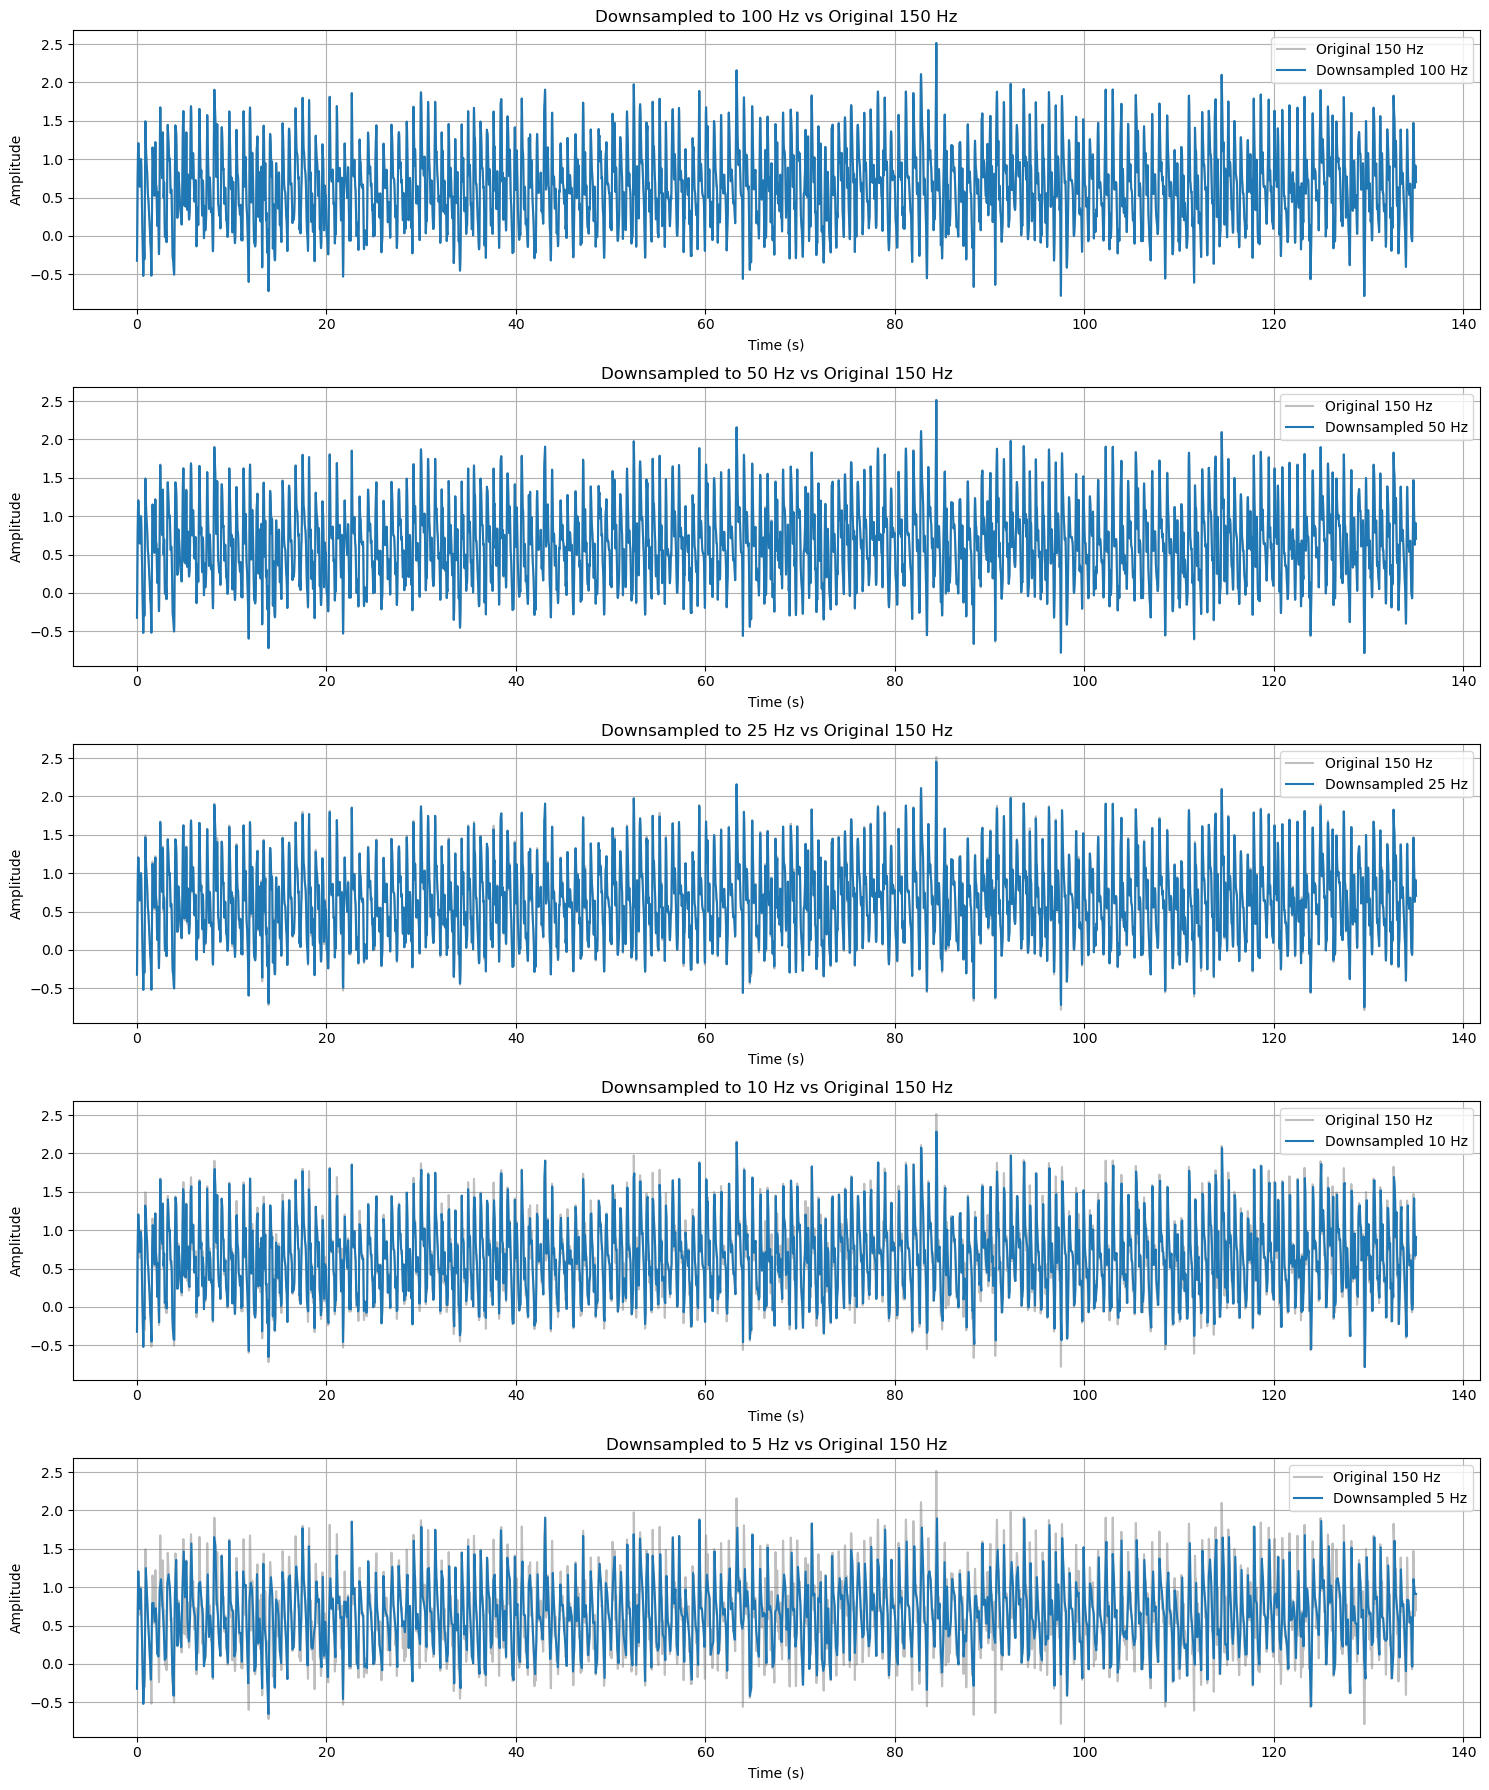

In [73]:
import numpy as np

# Fungsi downsampling
def downsample(signal, original_fs, target_fs):
    factor = int(original_fs / target_fs)
    return signal[::factor]

# Daftar sampling rate target
target_fs_list = [100, 50, 25, 10, 5]

# Downsampling sinyal
ppg_downsampled = {}
time_downsampled = {}

# Vektor waktu asli
time_original = np.linspace(0, duration, len(ppg_signal))

for fs in target_fs_list:
    ppg_downsampled[fs] = downsample(ppg_signal, sampling_rate, fs)
    time_downsampled[fs] = np.linspace(0, duration, len(ppg_downsampled[fs]))

# Visualisasi
plt.figure(figsize=(15, 18))

# Plot sinyal original untuk referensi (di setiap plot)
for idx, fs in enumerate(target_fs_list, start=1):
    plt.subplot(len(target_fs_list), 1, idx)
    plt.plot(time_original, ppg_signal, label="Original 150 Hz", color='gray', alpha=0.5)  
    plt.plot(time_downsampled[fs], ppg_downsampled[fs], label=f"Downsampled {fs} Hz")
    plt.title(f"Downsampled to {fs} Hz vs Original 150 Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### Analisis Distorsi dan Aliasing pada Downsampling

Berdasarkan visualisasi sinyal hasil downsampling, berikut hasil analisis berdasarkan visualiasi sinyal hasil downsampling yang telah dilakukan:

1. **Distorsi Sinyal**:
    - Ketika frekuensi sampling diturunkan, jumlah sampel yang digunakan untuk merepresentasikan sinyal asli berkurang. Hal ini menyebabkan detail dari sinyal asli hilang, sehingga sinyal hasil downsampling menjadi kurang akurat.
    - Pada frekuensi sampling yang lebih tinggi yaitu 100 Hz, sinyal hasil downsampling masih cukup mirip dengan sinyal asli. Namun, pada fs yang lebih rendah yaitu 5 Hz, sinyal menjadi semakin kasar, kehilangan detail penting, dan bentuknya  menyimpang dari sinyal asli.

2. **Aliasing**:
    - Aliasing adalah fenomena di mana frekuensi tinggi dalam sinyal asli tidak dapat direpresentasikan dengan benar setelah downsampling, sehingga muncul sebagai frekuensi rendah yang tidak ada dalam sinyal asli.
    - Pada fs yang sangat rendah yaitu 5 Hz, sinyal hasil downsampling menunjukkan pola yang tidak sesuai dengan sinyal asli. Ini adalah bukti bahwa aliasing telah terjadi.
    - Aliasing terjadi karena frekuensi sampling yang  tidak memenuhi kriteria Nyquist, yaitu fs harus setidaknya dua kali lipat dari frekuensi tertinggi dalam sinyal asli. Jika fs terlalu rendah, informasi frekuensi tinggi "terlipat" menjadi frekuensi rendah, menyebabkan distorsi yang tidak dapat diperbaiki.

3. **Observasi Visualisasi sinyal hasil downsampling**:
    - Pada fs = 100 Hz, sinyal hasil downsampling masih cukup halus dan menyerupai sinyal asli.
    - Pada fs = 50 Hz, sinyal mulai kehilangan beberapa detail, tetapi masih dapat dikenali.
    - Pada fs = 25 Hz, sinyal mulai menunjukkan perubahan yang lebih signifikan, dengan detail yang semakin berkurang.
    - Pada fs = 10 Hz, sinyal menjadi sangat kasar, dan pola yang tidak ada dalam sinyal asli mulai muncul.
    - Pada fs = 5 Hz, sinyal menjadi sangat banyak berubah, dengan pola yang tidak sesuai dengan sinyal asli, menunjukkan adanya aliasing.

### Kesimpulan
Semakin rendah sampling frequency (fs), sinyal akan semakin terdistorsi karena kehilangan detail penting. Pada fs yang sangat rendah, aliasing terjadi, menyebabkan munculnya pola yang tidak ada dalam sinyal asli. Oleh karena itu, penting untuk memilih fs yang cukup tinggi untuk merepresentasikan sinyal asli dengan akurat dan menghindari aliasing.

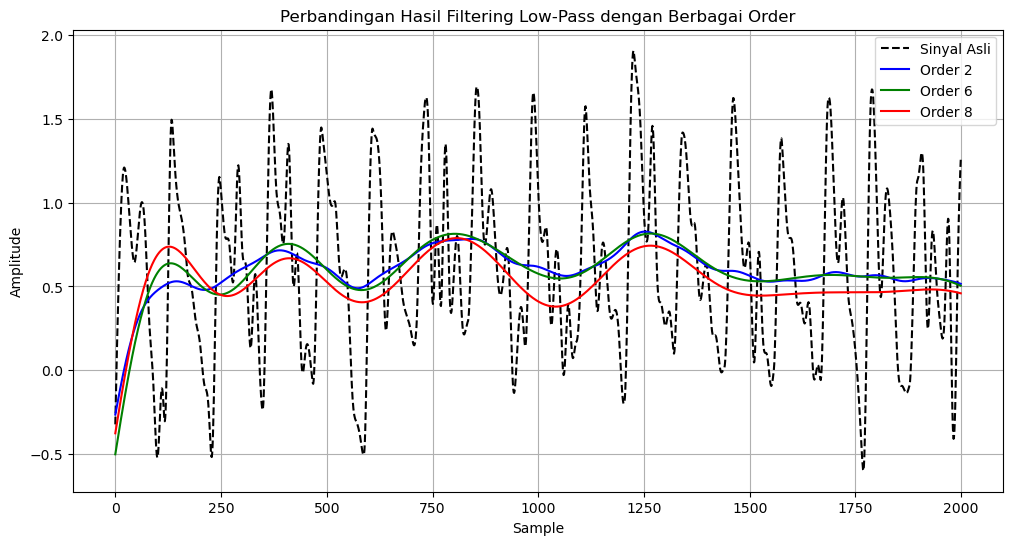

In [116]:
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# --- 1. Fungsi filter low-pass ---
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    low = cutoff / nyquist
    b, a = butter(order, low, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# --- 2. Parameter filter ---
cutoff = 0.5  # Frekuensi cutoff low-pass filter
sampling_rate = 150  # Sampling rate (150 Hz sesuai ketentuan)
orders = [2, 6, 8]  # Nilai order filter yang diuji
sample_limit = 2000  # Batas jumlah sampel

# --- 3. Visualisasi ---
plt.figure(figsize=(12, 6))

# Plot sinyal asli
plt.plot(ppg_signal[:sample_limit], label='Sinyal Asli', color='black', linestyle='--')

# Plot hasil filtering untuk tiap order
colors = ['blue', 'green', 'red']  # Warna untuk setiap order
for idx, order in enumerate(orders):
    filtered_signal = butter_lowpass_filter(ppg_signal, cutoff, fs=sampling_rate, order=order)
    plt.plot(filtered_signal[:sample_limit], label=f'Order {order}', color=colors[idx])

# Konfigurasi plot
plt.title('Perbandingan Hasil Filtering Low-Pass dengan Berbagai Order')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


### Analisis Hasil Visualisasi Sinyal dan Pengaruh Nilai Order pada Filtering

1. **Hasil Visualisasi Sinyal**:
    - Dari hasil visualisasi, sinyal yang difilter menunjukkan perbedaan yang signifikan dibandingkan dengan sinyal asli. Filtering berhasil menghilangkan noise dan komponen frekuensi yang tidak diinginkan, sehingga sinyal yang dihasilkan lebih bersih dan mendekati bentuk sinyal target.
    - Untuk mempermudah analisis, hanya **2000 sampel pertama** dari total **20000 sampel** yang divisualisasikan. Hal ini dilakukan agar pola sinyal lebih jelas terlihat dalam durasi yang lebih pendek.

2. **Pengaruh Nilai Order pada Filtering**:
    - **Order Rendah**:
        - Filter dengan order rendah menghasilkan transisi yang lebih halus antara passband dan stopband. Dapat dilihat pada nilai order 2 dengan warna biru.
        - Sinyal hasil filtering cenderung lebih halus.
        - Pada visualisasi, sinyal hasil filtering dengan order rendah terlihat lebih "kabur" atau kurang tajam.
    - **Order Tinggi**:
        - Filter dengan order tinggi menghasilkan transisi yang lebih tajam antara passband dan stopband. Dapat dilihat pada nilai order 6 dan 8.
        - Sinyal hasil filtering lebih bersih karena noise atau komponen frekuensi yang tidak diinginkan lebih efektif dihilangkan.
        - Namun, filter dengan order tinggi dapat menyebabkan overshoot atau distorsi pada sinyal, terutama di sekitar tepi transisi.
        - Pada visualisasi, sinyal hasil filtering dengan order tinggi terlihat lebih tajam dan mendekati bentuk sinyal target, tetapi mungkin menunjukkan sedikit distorsi.

3. **Kesimpulan**:
    - Pemilihan nilai order filter memengaruhi kualitas sinyal hasil filtering. Order yang lebih tinggi menghasilkan sinyal yang lebih bersih, tetapi dapat menyebabkan distorsi.
    - Visualisasi 2000 sampel pertama memberikan gambaran yang lebih jelas untuk analisis pola sinyal, tanpa harus memproses seluruh 20000 sampel.

# No II Eksperimen dengan merancang filter band-pass menggunakan signal.butter. Pada sinyal respirasi (pernapasan). Generate sebuah signal dengan ketentuan:
- **Durasi**: 135 (dalam second)
- **Sampling Rate**: 150 Hz.
- **Noise Level**: 0.<2 digit NIM terakhir> → 0.35.
- **Heart Rate**: 80 Beat Per Minute (BPM).
- **Random State**: Tanggal bulan tahun lahir Anda dengan format YYMMD. --> 031209 (09 Desember 2003)


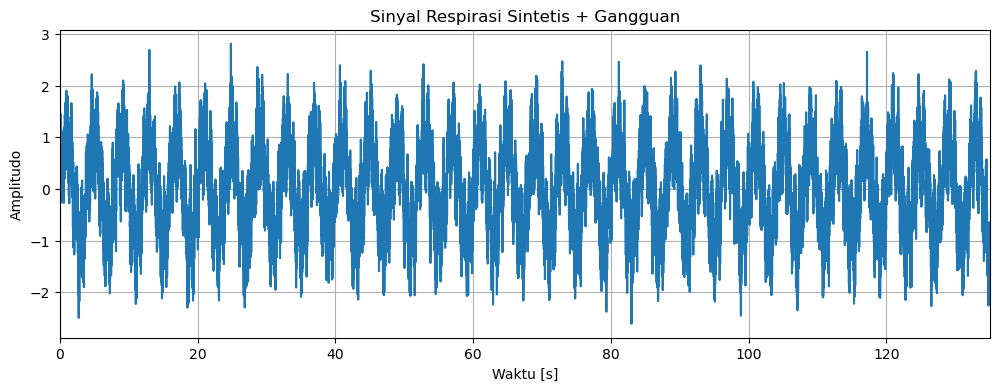

In [75]:
from scipy.signal import butter, filtfilt, freqz

# Parameter
duration = 135  #NIM terakhir 135 (122140135)
fs = 150        # sampling rate
t = np.linspace(0, duration, int(duration * fs), endpoint=False)
noise_level = 0.35 # 0.(2 digit nim terakhir dari nim) 0.35
heart_rate_freq = 80 / 60  # BPM ke Hz (~1.33 Hz)

# Random state menggunakan tanggal lahir, bulan, tahun lahir (yymmdd) --> 09 desember 2003 # (yymmdd) --> 031209
np.random.seed(31209)

# Membuat sinyal respirasi (frekuensi 0.25 Hz)
respiration_signal = np.sin(2 * np.pi * 0.25 * t)

# Menambahkan gangguan dari jantung
heart_signal = 0.5 * np.sin(2 * np.pi * heart_rate_freq * t)

# Noise acak
noise = noise_level * np.random.randn(len(t))

# Gabungkan semua
signal = respiration_signal + heart_signal + noise

# Plot sinyal
plt.figure(figsize=(12, 4))
plt.plot(t, signal)
plt.title('Sinyal Respirasi Sintetis + Gangguan')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.xlim(0, 135)  
plt.show()


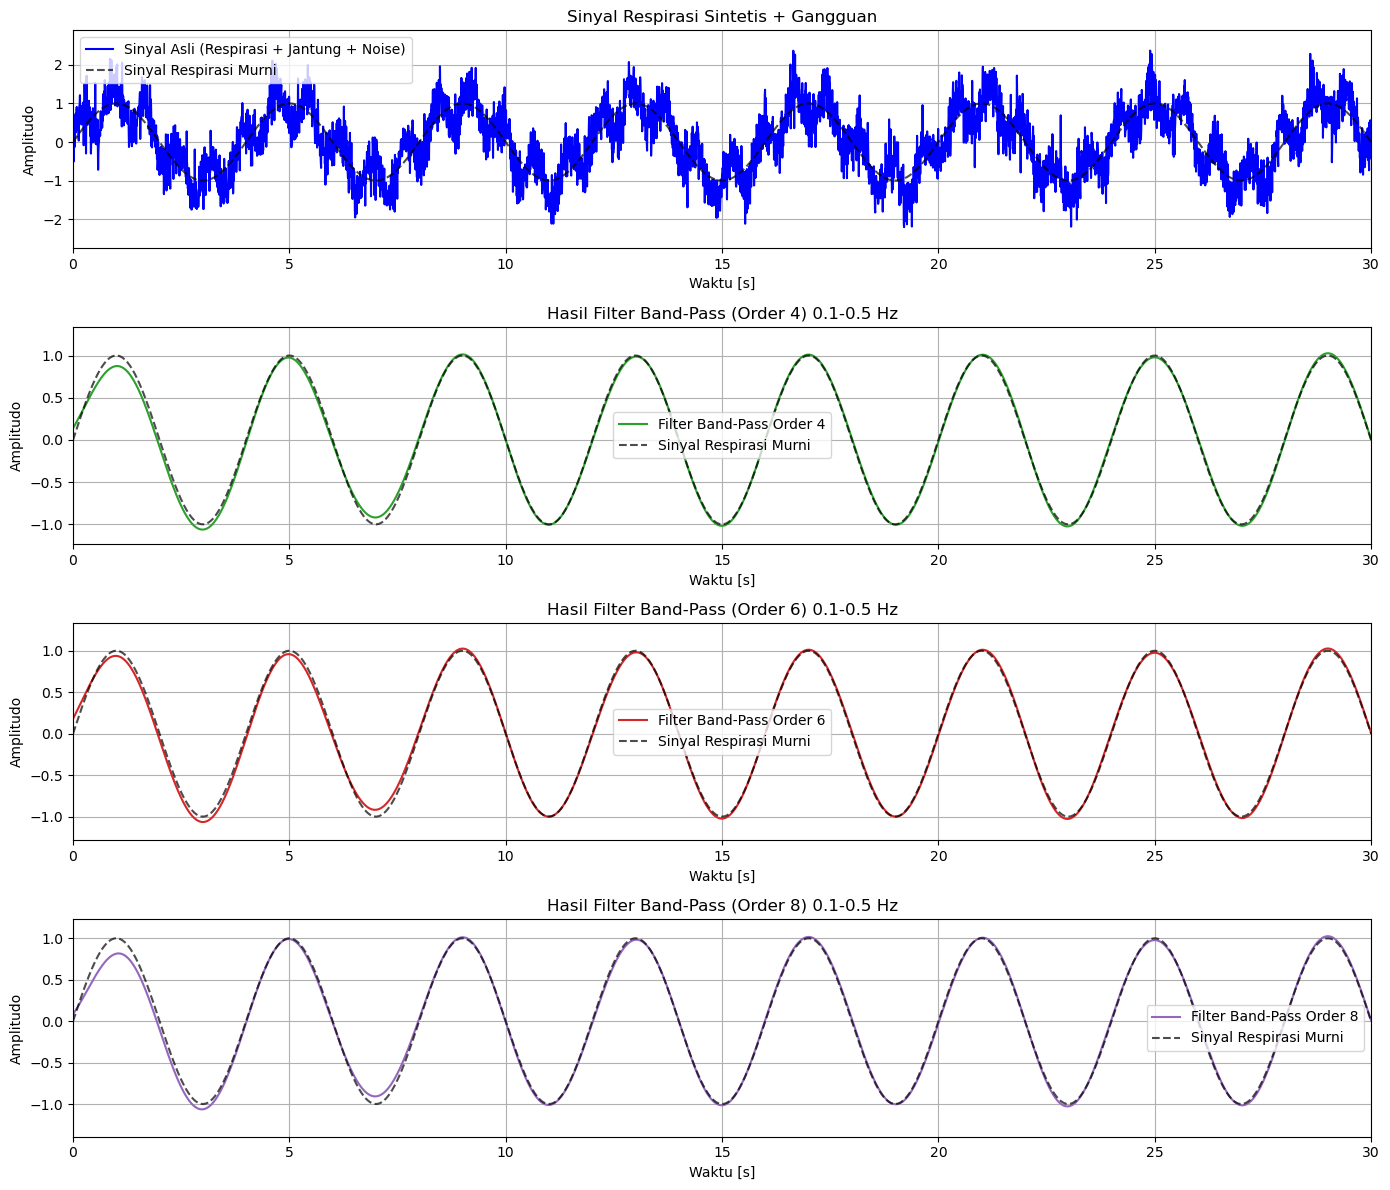

In [82]:
from scipy.signal import butter, sosfiltfilt, sosfreqz

# 1. DESAIN BAND-PASS FILTER (Dengan Variasi Order)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = butter(order, [low, high], btype='band', output='sos')
    return sos

def apply_filter(signal, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_signal = sosfiltfilt(sos, signal)
    return filtered_signal

# Parameter
cutoff = (0.1, 0.5)
orders = [4, 6, 8]  # Variasi order filter

# Simpan hasil filter untuk tiap order
filtered_signals = {}
for order in orders:
    filtered_signals[order] = apply_filter(signal, cutoff[0], cutoff[1], fs, order=order)

# 2. VISUALISASI HASIL

plt.figure(figsize=(14, 12))

# Subplot 1: Sinyal Asli
plt.subplot(len(orders)+1, 1, 1)
plt.plot(t, signal, label='Sinyal Asli (Respirasi + Jantung + Noise)', color='blue')
plt.plot(t, respiration_signal, '--', label='Sinyal Respirasi Murni', color='black', alpha=0.7)
plt.title('Sinyal Respirasi Sintetis + Gangguan')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid(True)
plt.xlim(0, 30)

# Subplot 2+: Filter hasil
for idx, order in enumerate(orders, start=2):
    plt.subplot(len(orders)+1, 1, idx)
    plt.plot(t, filtered_signals[order], label=f'Filter Band-Pass Order {order}', color='C'+str(idx))
    plt.plot(t, respiration_signal, '--', label='Sinyal Respirasi Murni', color='black', alpha=0.7)
    plt.title(f'Hasil Filter Band-Pass (Order {order}) 0.1-0.5 Hz')
    plt.xlabel('Waktu [s]')
    plt.ylabel('Amplitudo')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 30)

plt.tight_layout()


### Analisis Visualisasi Sinyal dengan Filtering Band-Pass (Cutoff 0.1 - 0.5 Hz)
1. Untuk mempermudah analisis, sinyal divisualisasikan hanya pada 30 detik pertama dari total durasi 135 detik. Hal ini dilakukan karena dalam durasi yang lebih pendek, bentuk sinyal menjadi lebih jelas terlihat, sehingga memudahkan pengamatan pola dan karakteristik sinyal respirasi. Kemudian ketika visualisasi filtering, menggunakan rentang amplitude dari -1.0 sampai dengan 1.0
2. **Alasan Pemilihan Frekuensi Cutoff**:
    - Frekuensi respirasi manusia umumnya berada dalam rentang 0.1 - 0.5 Hz, sehingga cutoff ini dipilih untuk memastikan bahwa sinyal respirasi dapat dipertahankan dengan baik.
    - Frekuensi di luar rentang ini, seperti noise  dan sinyal jantung yaitu 1.33 Hz, dapat dihilangkan untuk mendapatkan sinyal respirasi yang lebih bersih.

3. **Hasil Filtering**:
    - Sinyal hasil filtering menunjukkan bahwa komponen frekuensi respirasi berhasil dipertahankan, sementara noise dan gangguan dari sinyal jantung sebagian besar telah dihilangkan.
    - Pada visualisasi, sinyal yang dihasilkan lebih halus dan mendekati bentuk sinyal respirasi murni.

4. **Pengaruh Order Filter**:
    - **Order Rendah (4)**: Transisi antara passband dan stopband lebih halus, sehingga sinyal hasil filtering masih mengandung sedikit noise.
    - **Order Tinggi (6, 8)**: Transisi lebih tajam, menghasilkan sinyal yang lebih bersih dengan noise yang lebih sedikit. Namun, order yang terlalu tinggi dapat menyebabkan distorsi. Distorsi ini maksudnya menghasilkan perubahan bentuk sinyal yang tidak diinginkan.

5. **Kesimpulan**:
    - Dengan menerqapkan filtering bandpass sinyal respirasi menjadi lebih bersih, dengan noise dan gangguan yang berkurang secara signifikan. Komponen frekuensi sinyal dalam rentang yang ditentukan yaitu  0.1-0.5 Hz dipertahankan, sementara komponen lain dihilangkan.
    - Ketika mmenggunakan filtering
    - Pemilihan order filter yang tepat penting untuk menjaga keseimbangan antara kebersihan sinyal dan distorsi.


# Soal Nomor III

Sampling rate: 44100 Hz
Jumlah sample: 973440
Durasi: 22.07 detik


(0.0, 22.073469387755104)

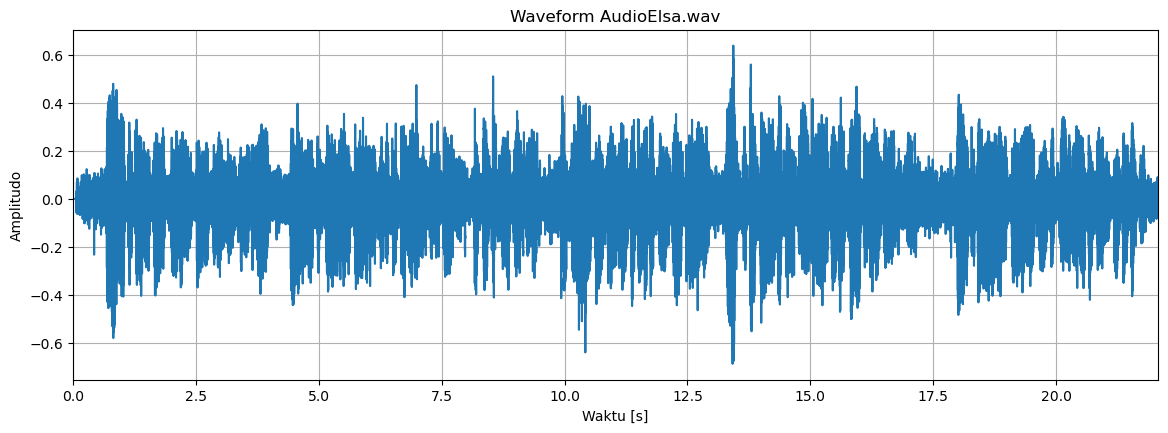

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

# Baca file audio
fs, audio = wavfile.read('AudioElsa.wav')

print(f"Sampling rate: {fs} Hz")
print(f"Jumlah sample: {len(audio)}")
print(f"Durasi: {len(audio)/fs:.2f} detik")

# Normalisasi (kalau integer)
if audio.dtype == np.int16:
    audio = audio / 32768.0
elif audio.dtype == np.int32:
    audio = audio / 2147483648.0
elif audio.dtype == np.uint8:
    audio = (audio - 128) / 128.0

# Vektor waktu
t = np.linspace(0, len(audio)/fs, len(audio))

# Visualisasi sinyal asli
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(t, audio)
plt.title('Waveform AudioElsa.wav')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.xlim(0, t[-1])


### Penjelasan

Berdasarkan visualisasi sinyal audio di atas, dapat dianalisis
**Sinyal Asli**:
    - Sinyal asli menunjukkan adanya noise dan komponen frekuensi yang tidak diinginkan, yang dapat mengganggu kualitas audio. Noise dalam hal ini adalah suara kipas angin. 
    - Amplitudo sinyal bervariasi, mencerminkan adanya campuran berbagai frekuensi dalam sinyal.

## Sinyal Sebelum dan Sesudah Filtering

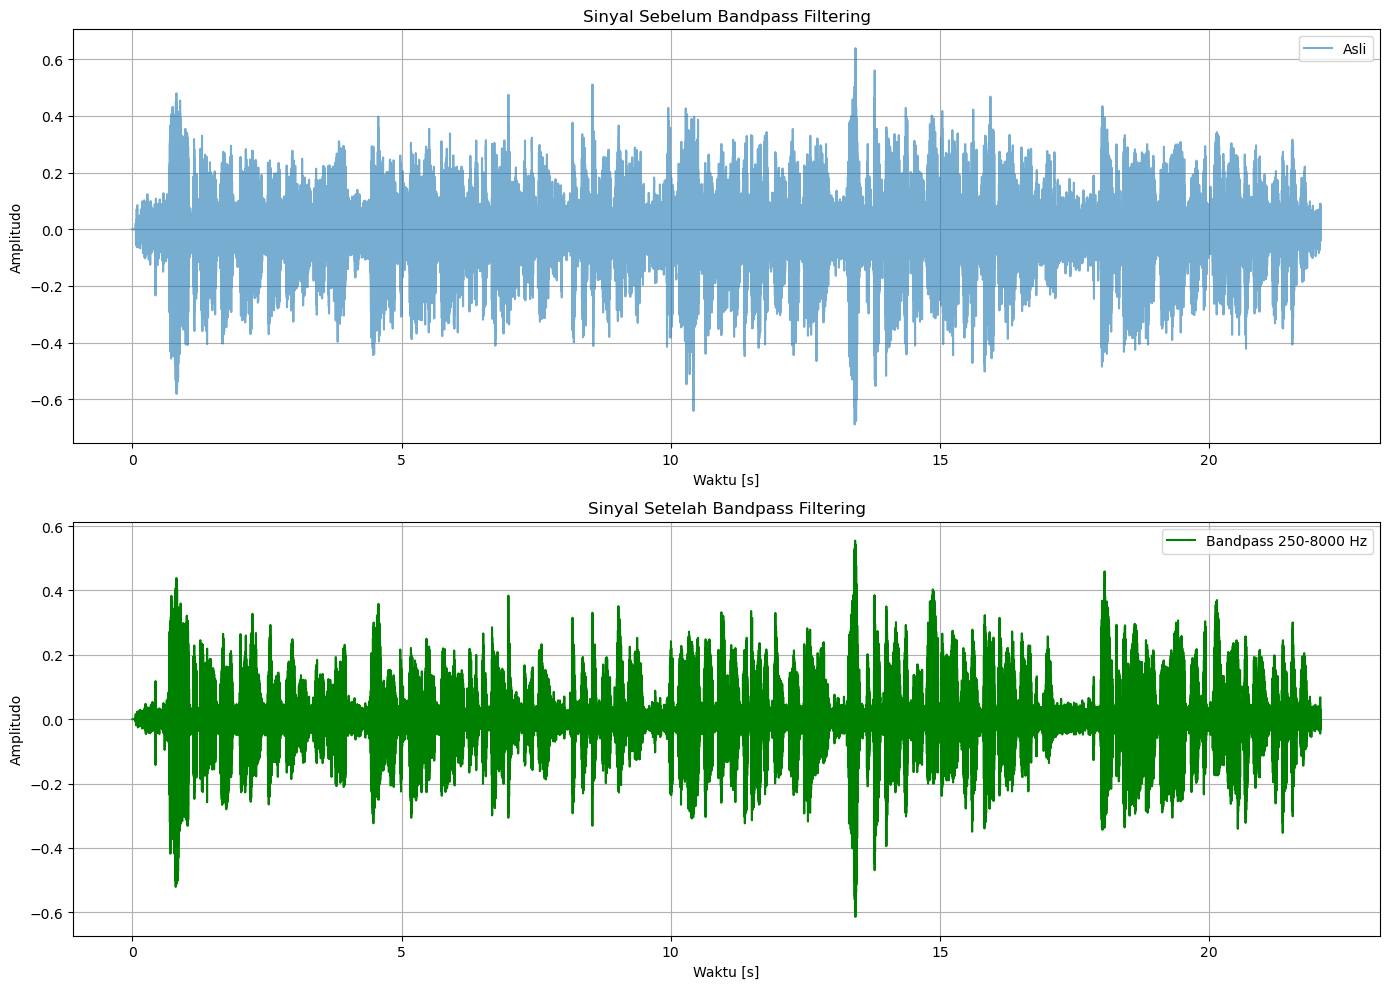

In [118]:
from scipy.signal import butter, filtfilt

# Fungsi untuk membuat bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Fungsi untuk menerapkan bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Terapkan filter
lowcut = 250     # batas bawah 250 Hz
highcut = 8000  # batas atas 8000 Hz
audio_filtered = bandpass_filter(audio, lowcut, highcut, fs, order=5)

# --- Visualisasi hasil ---
plt.figure(figsize=(14, 10))

# Sinyal sebelum filtering
plt.subplot(2, 1, 1)
plt.plot(t, audio, label='Asli', alpha=0.6)
plt.title('Sinyal Sebelum Bandpass Filtering')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()

#Sinyal setelah bandpass filtering
plt.subplot(2, 1, 2)
plt.plot(t, audio_filtered, label=f'Bandpass {lowcut}-{highcut} Hz', color='green')
plt.title('Sinyal Setelah Bandpass Filtering')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


**Sinyal Setelah Filtering**:
    - Setelah dilakukan bandpass filtering dengan rentang frekuensi 250 Hz hingga 8000 Hz, sinyal menjadi lebih bersih.
    - Penentuan  frekuensi ini, setelah dilakukan percobaan yang berulang ulang untuk menentukan batasnya, dan diperoleh hasil akhir dalam rentang 250 Hz - 8000 Hz, yang menghasilkan audio yang lebih jernih.
    - Komponen frekuensi di luar rentang yang diinginkan berhasil dihilangkan, sehingga sinyal lebih fokus pada frekuensi yang relevan.

## Analisis Perbandingan FFT Sebelum dan Sesudah Filtering

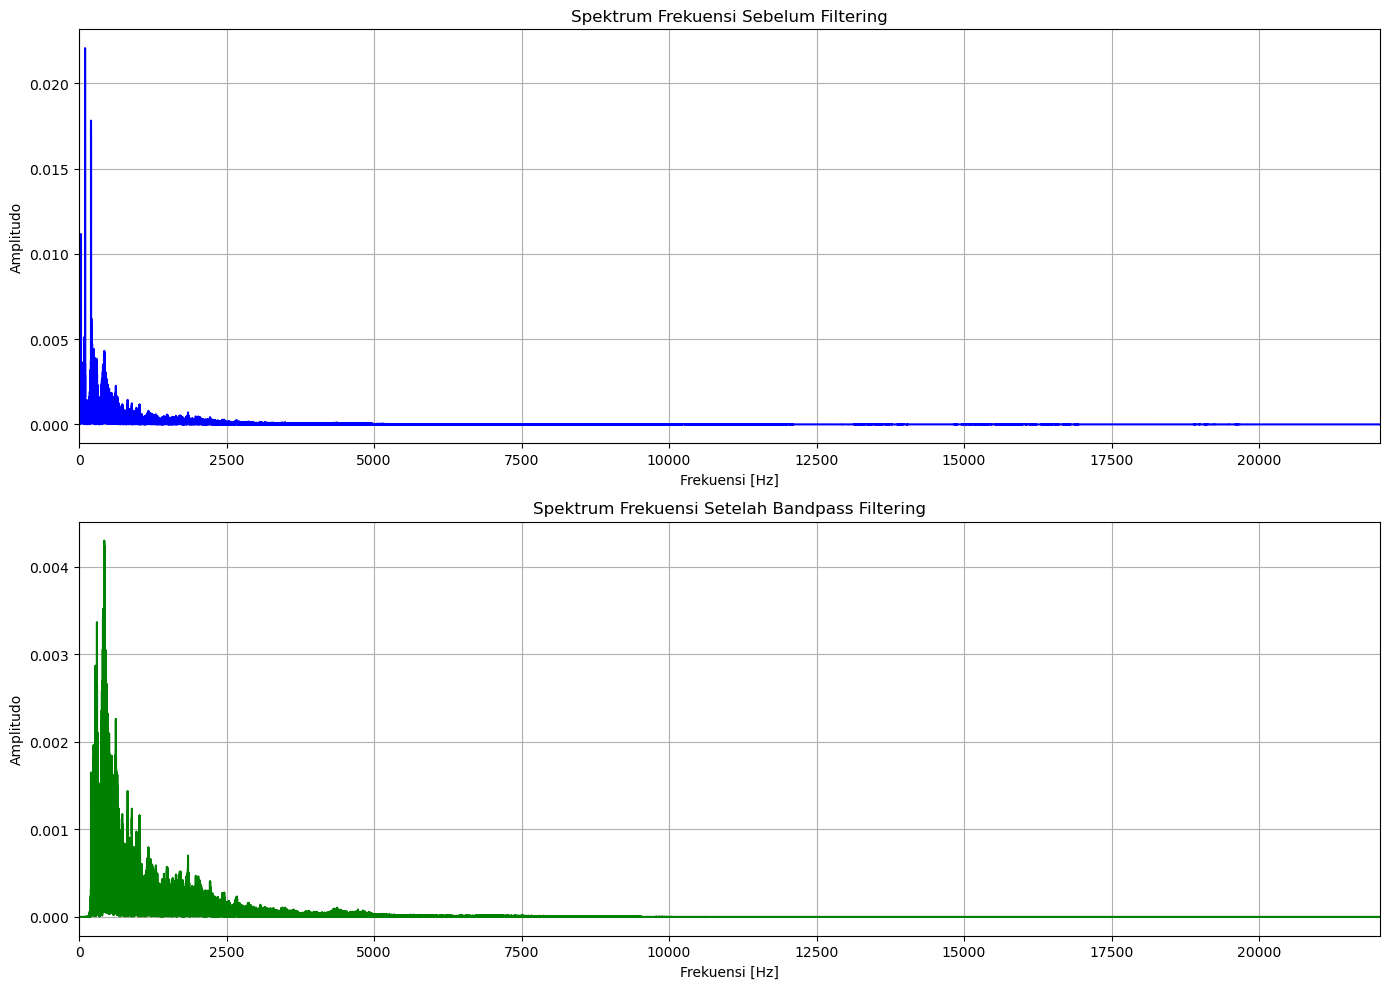

In [115]:
# FFT setelah filtering
yf_filtered = fft(audio_filtered)

plt.figure(figsize=(14, 10))

# Spektrum sebelum filtering
plt.subplot(2, 1, 1)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), label='Asli', color='blue')
plt.title('Spektrum Frekuensi Sebelum Filtering')
plt.xlabel('Frekuensi [Hz]')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.xlim(0, fs/2)

# Spektrum setelah bandpass filtering
plt.subplot(2, 1, 2)
plt.plot(xf, 2.0/N * np.abs(yf_filtered[:N//2]), label=f'Bandpass {lowcut}-{highcut} Hz', color='green')
plt.title('Spektrum Frekuensi Setelah Bandpass Filtering')
plt.xlabel('Frekuensi [Hz]')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.xlim(0, fs/2)

plt.tight_layout()
plt.show()


**Spektrum Frekuensi**:
    - Sebelum filtering, spektrum frekuensi menunjukkan adanya energi pada frekuensi rendah dan tinggi yang tidak diinginkan.
    - Setelah filtering, energi pada frekuensi di luar rentang 250 Hz hingga 8000 Hz berkurang secara signifikan, menunjukkan bahwa filter bekerja dengan baik.


## Menyimpan File Audio yang Telah dilakukan Filtering

In [ ]:
from scipy.io.wavfile import write

audio_filtered_int16 = np.int16(audio_filtered / np.max(np.abs(audio_filtered)) * 32767)

# Simpan ke file
write('AudioElsa_filtered.wav', fs, audio_filtered_int16)

print("Audio hasil filtering berhasil disimpan sebagai 'AudioElsa_filtered.wav'.")


Audio hasil filtering berhasil disimpan sebagai 'AudioElsa_filtered.wav'.


### Kesimpulan
Filtering bandpass efektif untuk membersihkan sinyal audio dengan menghilangkan noise dan komponen frekuensi yang tidak diinginkan. Hal ini meningkatkan kualitas sinyal dan membuatnya lebih fokus pada frekuensi yang relevan.

## Tautan GitHub 
https://github.com/elsaelisa09/Data-Signal-Processing 


## Tautan LLM yang digunakan
Chat GPT 1 : https://chatgpt.com/share/680f9732-cdec-8010-9d29-4ab6ce0ac09a
Chat GPT 2 : https://chatgpt.com/share/680f984a-4c08-800f-b954-d51e94f75b43

Selain itu, terdapat juga sumber refrensi menggunakan Deep Seek.

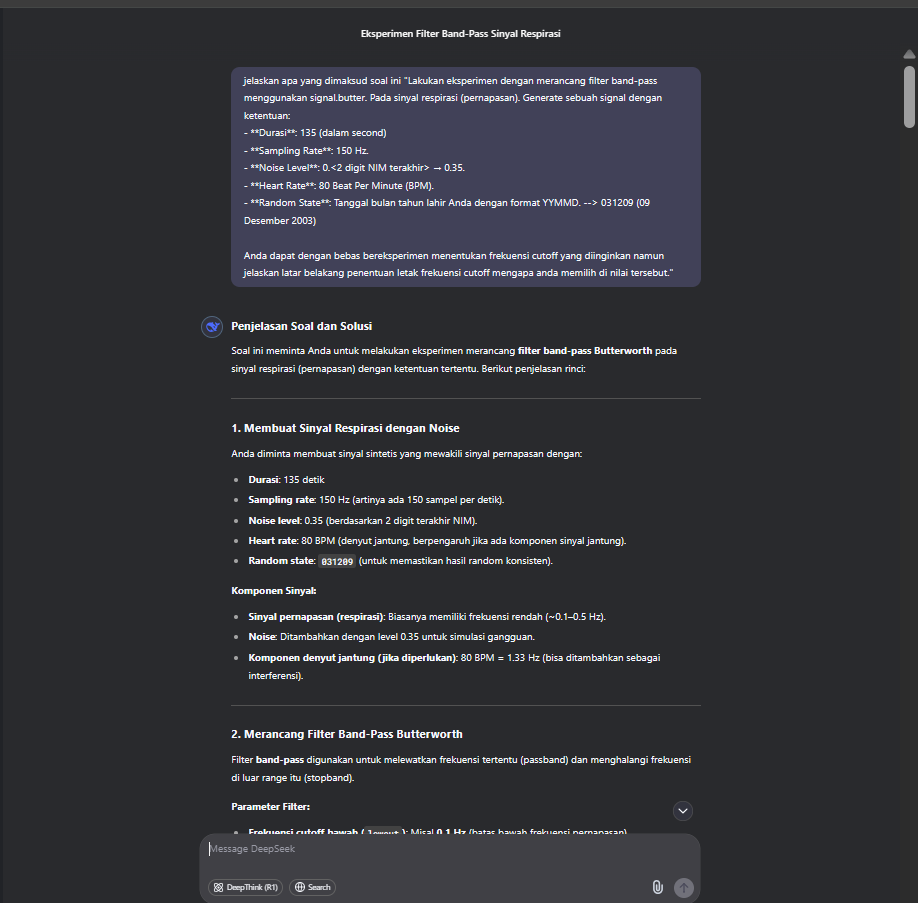
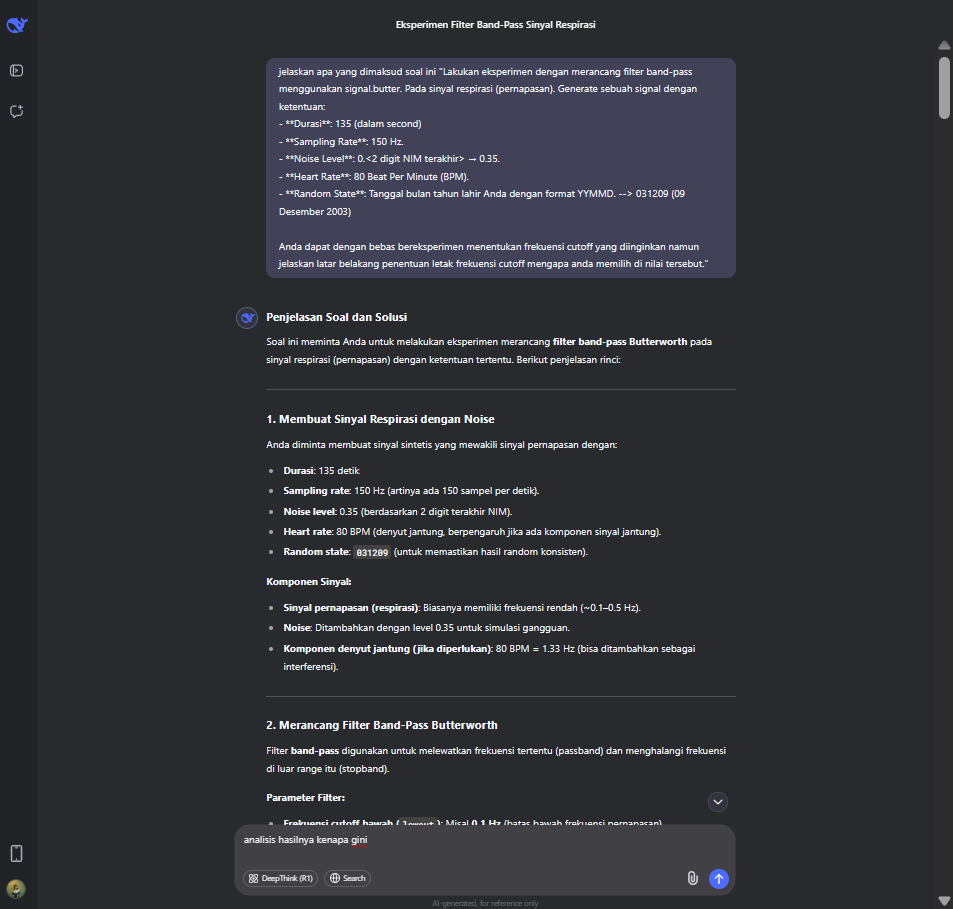

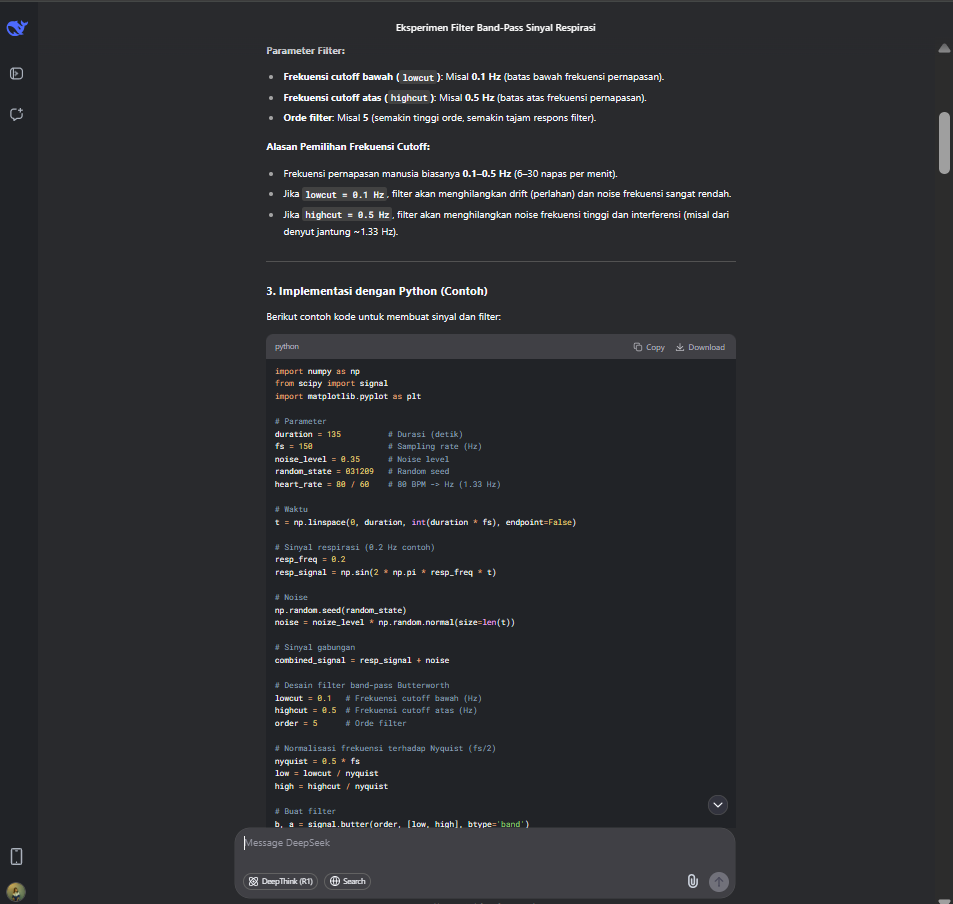
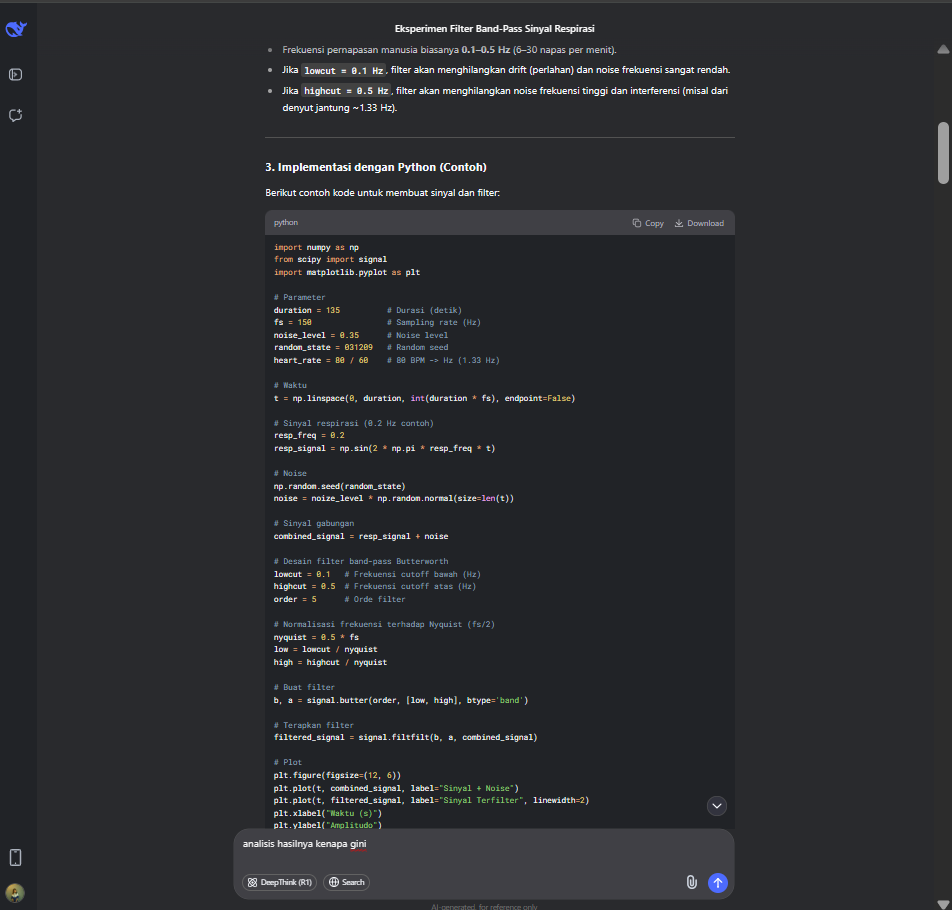

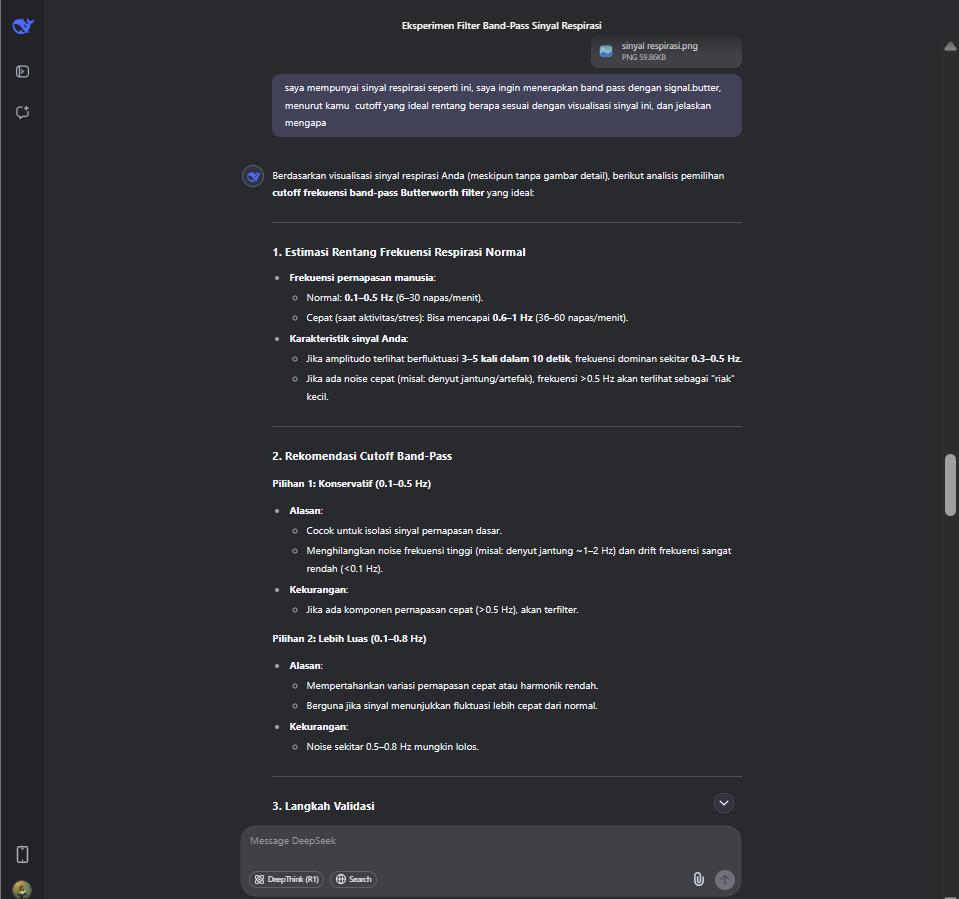

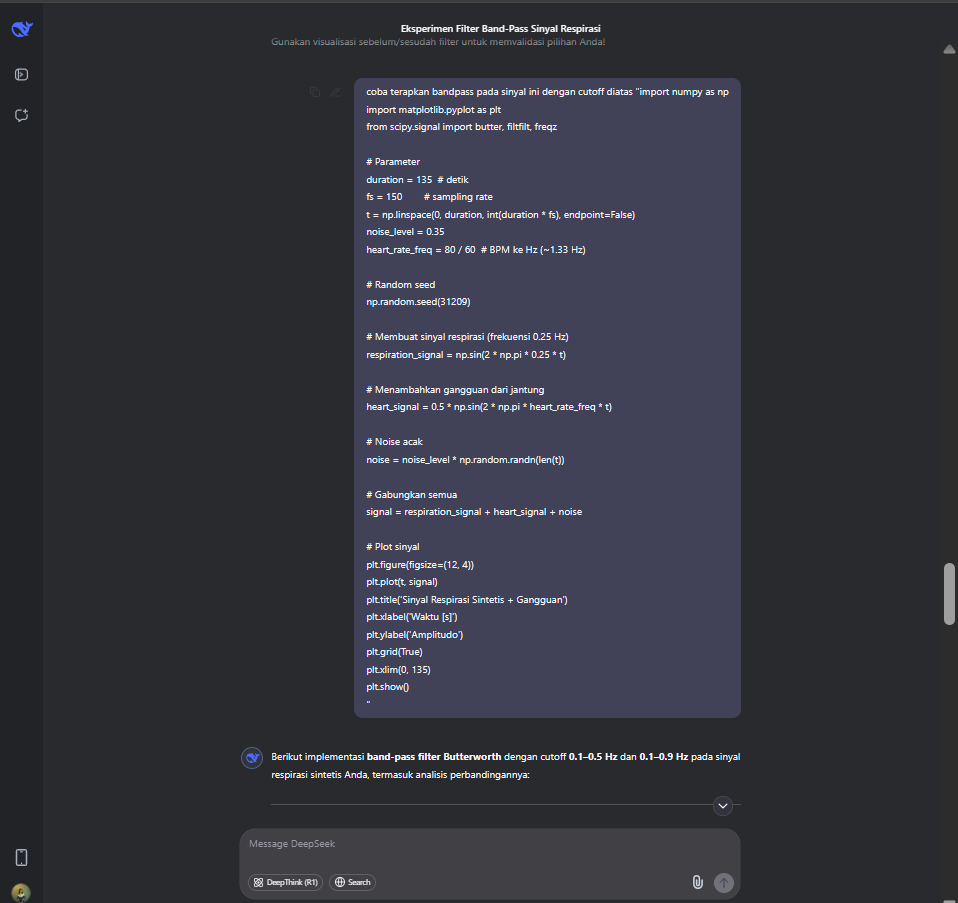

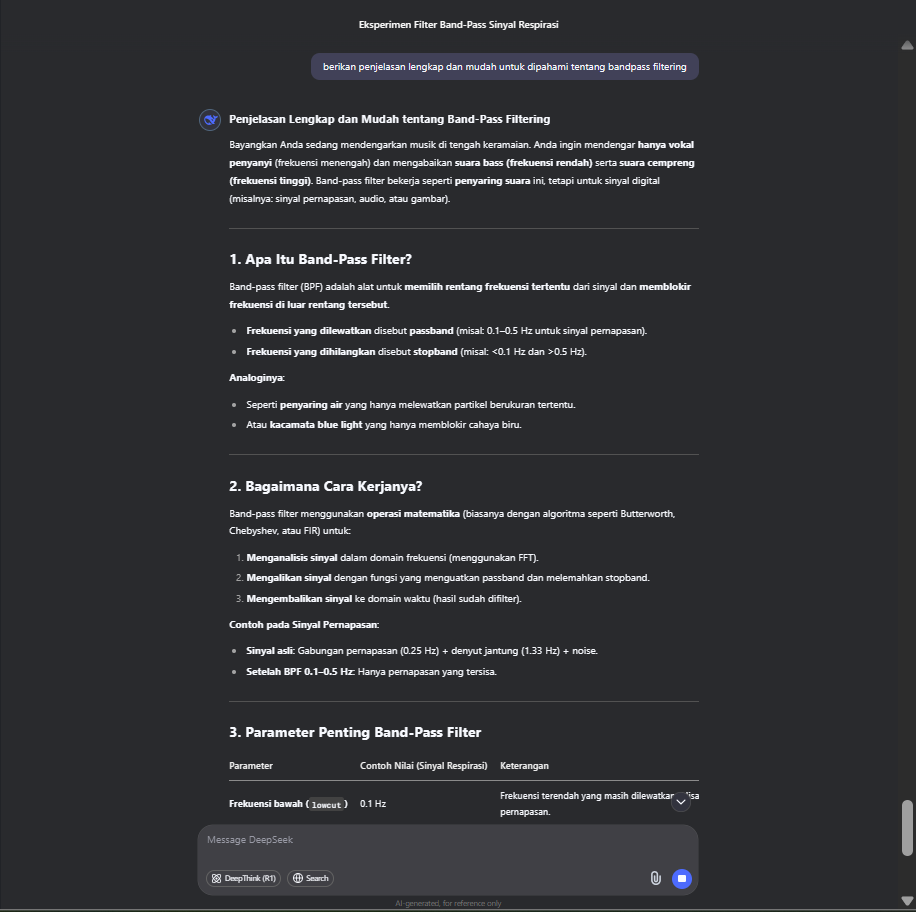